<a href="https://colab.research.google.com/github/andiishak67/DQ-Lab-Python/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dataset_statistic.csv", sep=';')
plt.clf()

raw_data.head()

,ID Pelanggan,Nama,Jenis Kelamin,Pendapatan,Produk,Harga,Jumlah,Total,Tingkat Kepuasan
0,1,Arif,1,600000,A,100000,4,400000,2
1,2,Dian,2,1200000,D,250000,4,1000000,2
2,3,Dinda,2,950000,D,250000,3,750000,3
3,4,Fajar,1,400000,A,100000,2,200000,3
4,5,Ika,2,1200000,D,250000,4,1000000,2


<Figure size 640x480 with 0 Axes>

In [37]:
raw_data.describe()

,ID Pelanggan,Jenis Kelamin,Pendapatan,Harga,Jumlah,Total,Tingkat Kepuasan
count,20.00000,20.000000,2.000000e+01,20.000000,20.000000,2.000000e+01,20.000000
mean,10.50000,1.700000,1.160000e+06,197500.000000,3.650000,7.100000e+05,2.050000
std,5.91608,0.470162,1.282842e+06,69726.910912,1.182103,3.338768e+05,0.887041
min,1.00000,1.000000,4.000000e+05,100000.000000,1.000000,2.000000e+05,1.000000
25%,5.75000,1.000000,6.750000e+05,150000.000000,3.000000,4.750000e+05,1.000000
50%,10.50000,2.000000,8.750000e+05,200000.000000,4.000000,6.750000e+05,2.000000
75%,15.25000,2.000000,1.125000e+06,250000.000000,4.250000,9.250000e+05,3.000000
max,20.00000,2.000000,6.450000e+06,300000.000000,5.000000,1.500000e+06,3.000000


<Figure size 640x480 with 0 Axes>

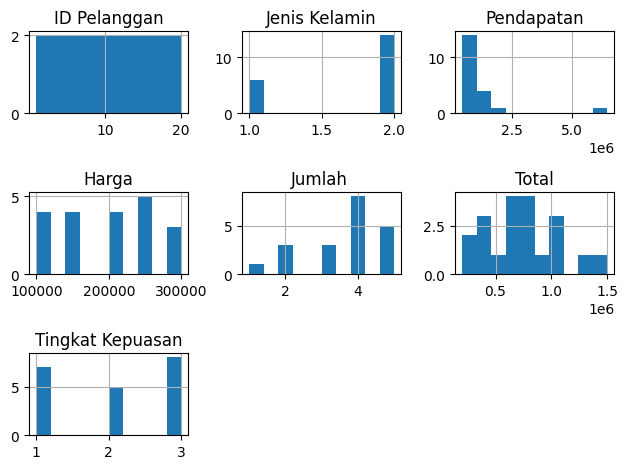

In [38]:
plt.figure()
raw_data.hist()
plt.title('Histogram seluruh kolom', size=14)
plt.tight_layout()
plt.show()

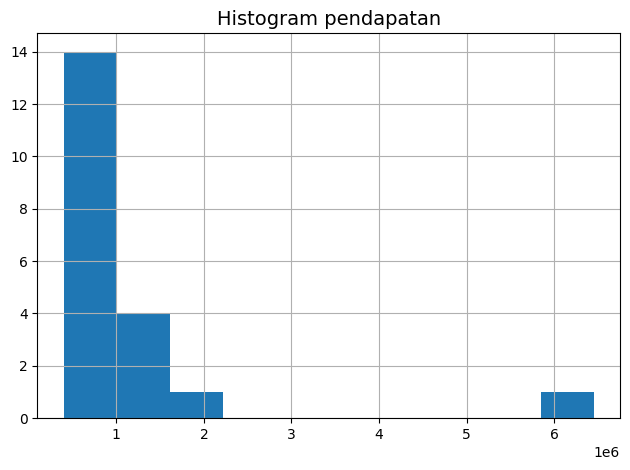

In [39]:
plt.figure()
raw_data['Pendapatan'].hist()
plt.title('Histogram pendapatan', size=14)
plt.tight_layout()
plt.show()

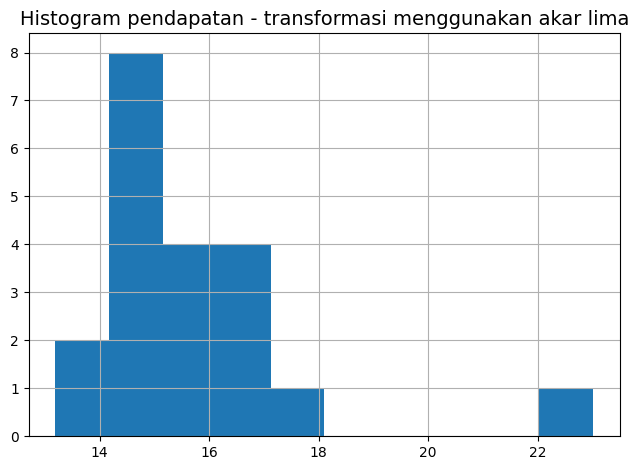

In [40]:
plt.figure()
# transformasi menggunakan akar lima
np.power(raw_data['Pendapatan'], 1/5).hist()
plt.title('Histogram pendapatan - transformasi menggunakan akar lima', size=14)
plt.tight_layout()
plt.show()

In [41]:
# simpan hasil transformasi
pendapatan_akar_lima = np.power(raw_data['Pendapatan'], 1/5)

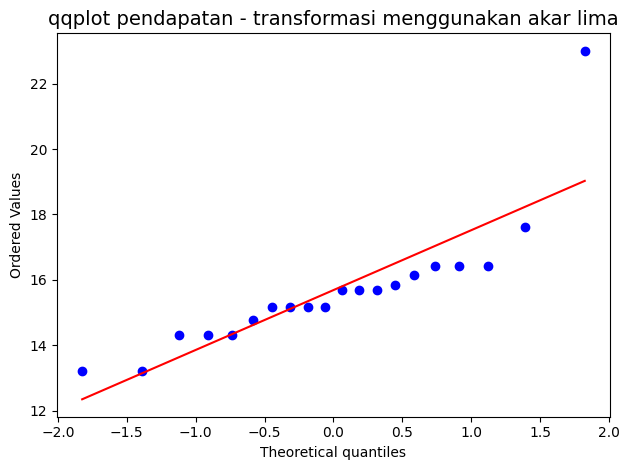

In [42]:
plt.figure()
# membuat qqplot pendapatan - transformasi menggunakan akar lima
stats.probplot(pendapatan_akar_lima, plot=plt)
plt.title('qqplot pendapatan - transformasi menggunakan akar lima', size=14)
plt.tight_layout()
plt.show()

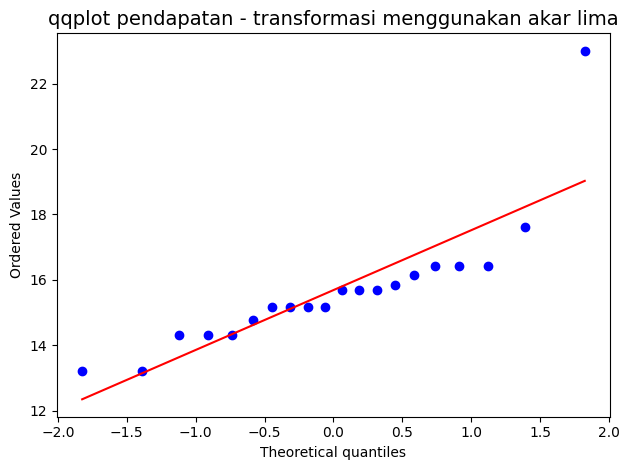

In [43]:
stats.probplot(pendapatan_akar_lima, plot=plt)
plt.title('qqplot pendapatan - transformasi menggunakan akar lima', size=14)
plt.tight_layout()
plt.show()

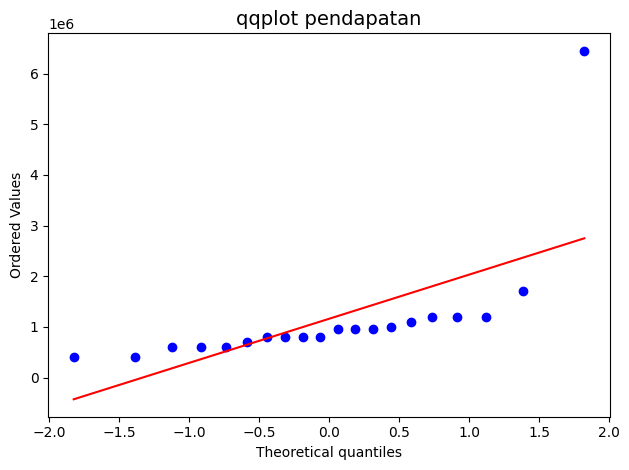

In [44]:
plt.figure()
# membuat qqplot pendapatan
stats.probplot(raw_data['Pendapatan'], plot=plt)
plt.title('qqplot pendapatan', size=14)
plt.tight_layout()
plt.show()

Salah satu cara yang paling mudah untuk melakukan transformasi secara otomatis adalah dengan menggunakan transformasi Box-Cox.

Untuk melakukan transformasi Box-Cox, kita dapat menggunakan method .boxcox dari scipy sebagaimana contoh berikut :

In [45]:
hasil, _ = stats.boxcox(raw_data['Pendapatan'])

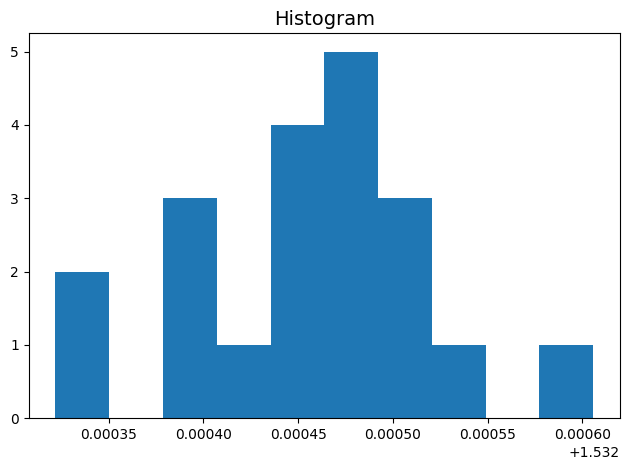

In [46]:
plt.figure()

plt.hist(hasil)
plt.title('Histogram', size=14)
plt.tight_layout()
plt.show()

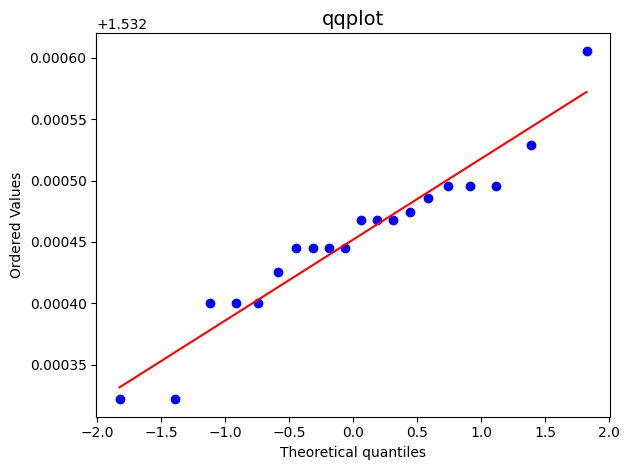

In [47]:
plt.figure()

stats.probplot(hasil, plot=plt)
plt.title('qqplot', size=14)
plt.tight_layout()
plt.show()

In [48]:
print(raw_data['Produk'])

data_dummy_produk = pd.get_dummies(raw_data['Produk'])

print(data_dummy_produk)


0     A
1     D
2     D
3     A
4     D
5     B
6     B
7     E
8     E
9     E
10    A
11    B
12    C
13    D
14    C
15    B
16    C
17    D
18    A
19    C
Name: Produk, dtype: object
        A      B      C      D      E
0    True  False  False  False  False
1   False  False  False   True  False
2   False  False  False   True  False
3    True  False  False  False  False
4   False  False  False   True  False
5   False   True  False  False  False
6   False   True  False  False  False
7   False  False  False  False   True
8   False  False  False  False   True
9   False  False  False  False   True
10   True  False  False  False  False
11  False   True  False  False  False
12  False  False   True  False  False
13  False  False  False   True  False
14  False  False   True  False  False
15  False   True  False  False  False
16  False  False   True  False  False
17  False  False  False   True  False
18   True  False  False  False  False
19  False  False   True  False  False


Lakukan transformasi Box-Cox dan transformasi pangka pada variabel Pendapatan dan hitung besaran skewness dengan method skew dari scipy.

In [49]:
hasil_1 = np.power(raw_data['Pendapatan'], 1/5)

stats.skew(hasil_1)

2.2843058545185624

In [50]:
hasil_2, _ = stats.boxcox(raw_data['Pendapatan'])

stats.skew(hasil_2)

-0.08060551023805974

<ipython-input-51-98211190eeae>:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

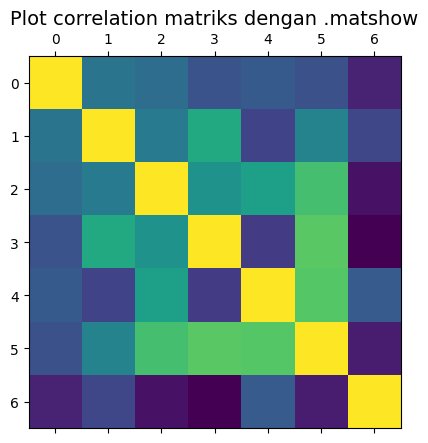

In [51]:
plt.figure()
plt.matshow(raw_data.corr(numeric_only=True))
plt.title('Plot correlation matriks dengan .matshow', size=14)
plt.tight_layout()
plt.show()

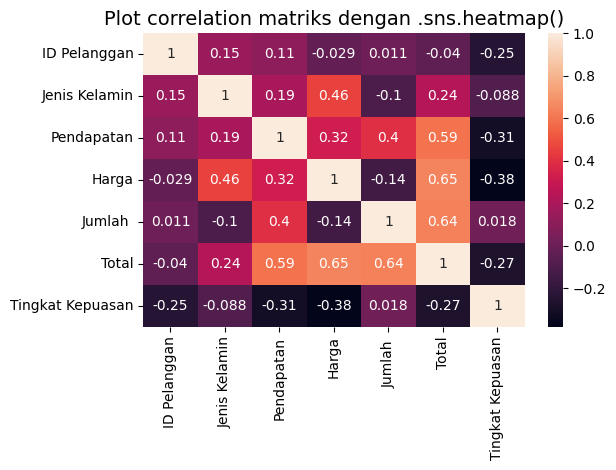

In [52]:
import seaborn as sns

plt.figure()
sns.heatmap(raw_data.corr(numeric_only=True), annot=True)
plt.title('Plot correlation matriks dengan .sns.heatmap()', size=14)
plt.tight_layout()
plt.show()

In [53]:
raw_data

,ID Pelanggan,Nama,Jenis Kelamin,Pendapatan,Produk,Harga,Jumlah,Total,Tingkat Kepuasan
0,1,Arif,1,600000,A,100000,4,400000,2
1,2,Dian,2,1200000,D,250000,4,1000000,2
2,3,Dinda,2,950000,D,250000,3,750000,3
3,4,Fajar,1,400000,A,100000,2,200000,3
4,5,Ika,2,1200000,D,250000,4,1000000,2
5,6,Ilham,1,800000,B,150000,4,600000,3
6,7,Indra,1,950000,B,150000,5,750000,1
7,8,Kartika,2,1100000,E,300000,3,900000,3
8,9,Lestari,2,800000,E,300000,2,600000,1
9,10,Lia,2,1700000,E,300000,5,1500000,1


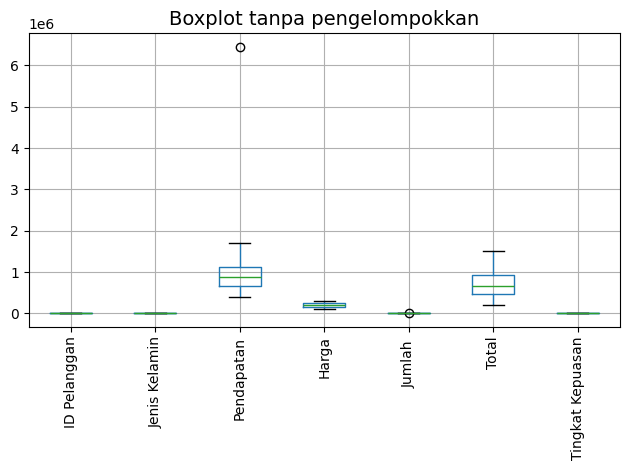

In [54]:
raw_data.boxplot(rot=90)
plt.title('Boxplot tanpa pengelompokkan', size=14)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

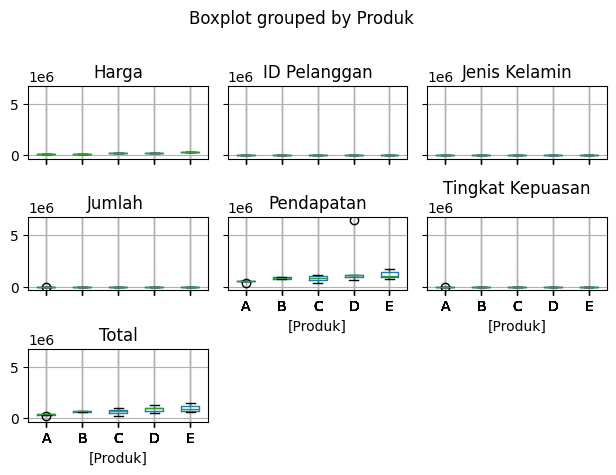

In [55]:
plt.figure()
# box plot dengan pengelompokkan dilakukan oleh kolom 'Produk'
raw_data.boxplot(by='Produk')
plt.tight_layout()
plt.show()

In [56]:
raw_data['Produk'].unique()

array(['A', 'D', 'B', 'E', 'C'], dtype=object)

<Figure size 640x480 with 0 Axes>

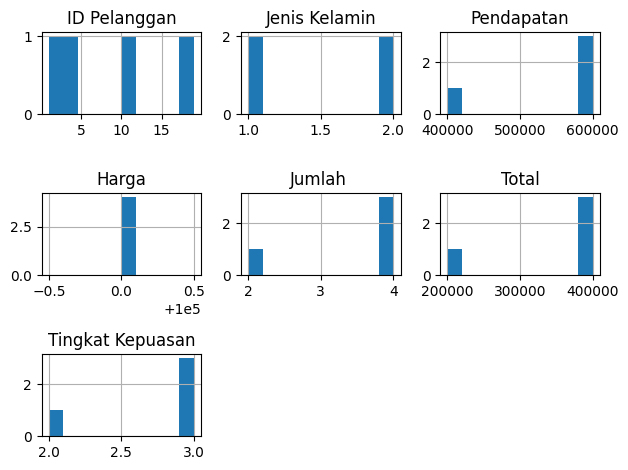

<Figure size 640x480 with 0 Axes>

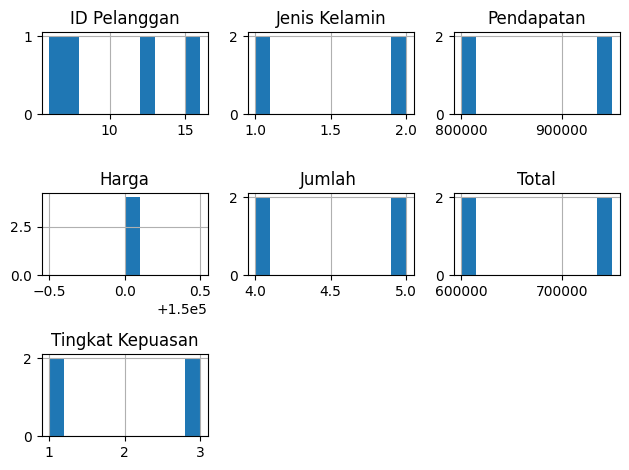

<Figure size 640x480 with 0 Axes>

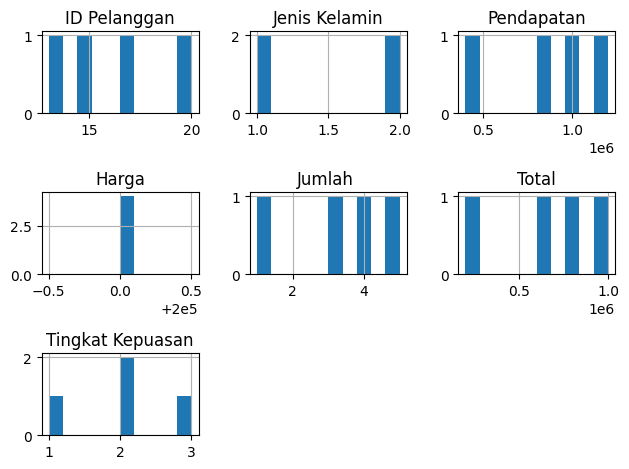

<Figure size 640x480 with 0 Axes>

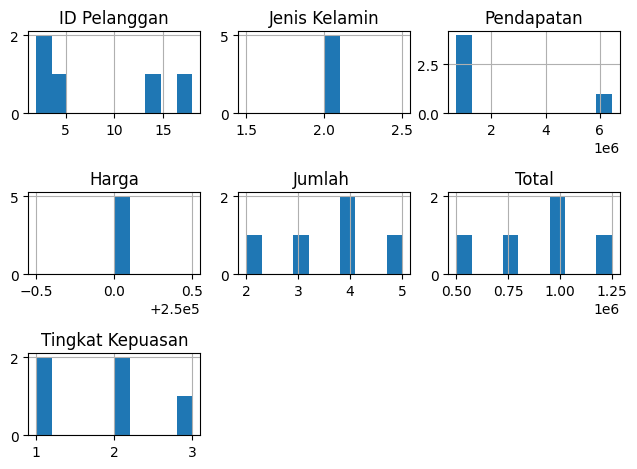

<Figure size 640x480 with 0 Axes>

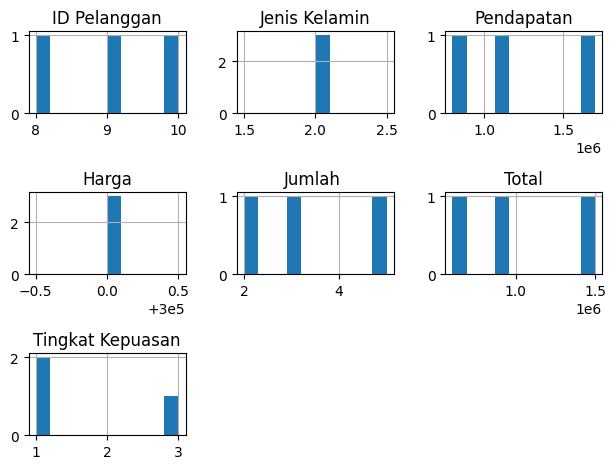

In [57]:
plt.figure()
raw_data[raw_data['Produk'] == 'A'].hist()
plt.tight_layout()
plt.show()

plt.figure()
raw_data[raw_data['Produk'] == 'B'].hist()
plt.tight_layout()
plt.show()

plt.figure()
raw_data[raw_data['Produk'] == 'C'].hist()
plt.tight_layout()
plt.show()

plt.figure()
raw_data[raw_data['Produk'] == 'D'].hist()
plt.tight_layout()
plt.show()

plt.figure()
raw_data[raw_data['Produk'] == 'E'].hist()
plt.tight_layout()
plt.show()

Hex Bin Plot
Hex bin plot adalah variasi dari scatter plot yang biasanya digunakan ketika kita mengolah data yang memiliki banyak sekali titik data. Sangat bermanfaat jika kita ingin memvisualisasikan data berukuran sangat besar. Kali ini kita akan coba melihat perbandingan Pendapatan dan Total.

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

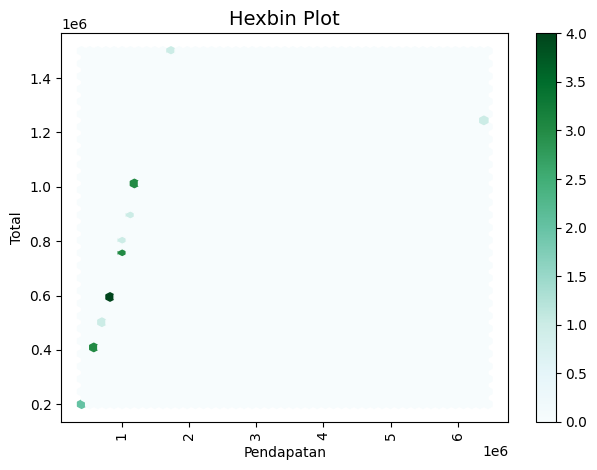

In [67]:
plt.clf()

plt.figure()
raw_data.plot.hexbin(x='Pendapatan', y='Total', gridsize=50, rot=90)
plt.title('Hexbin Plot', size=14)
plt.tight_layout()
plt.show()

<ipython-input-68-3e4afacc74d2>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(raw_data, ax=ax)


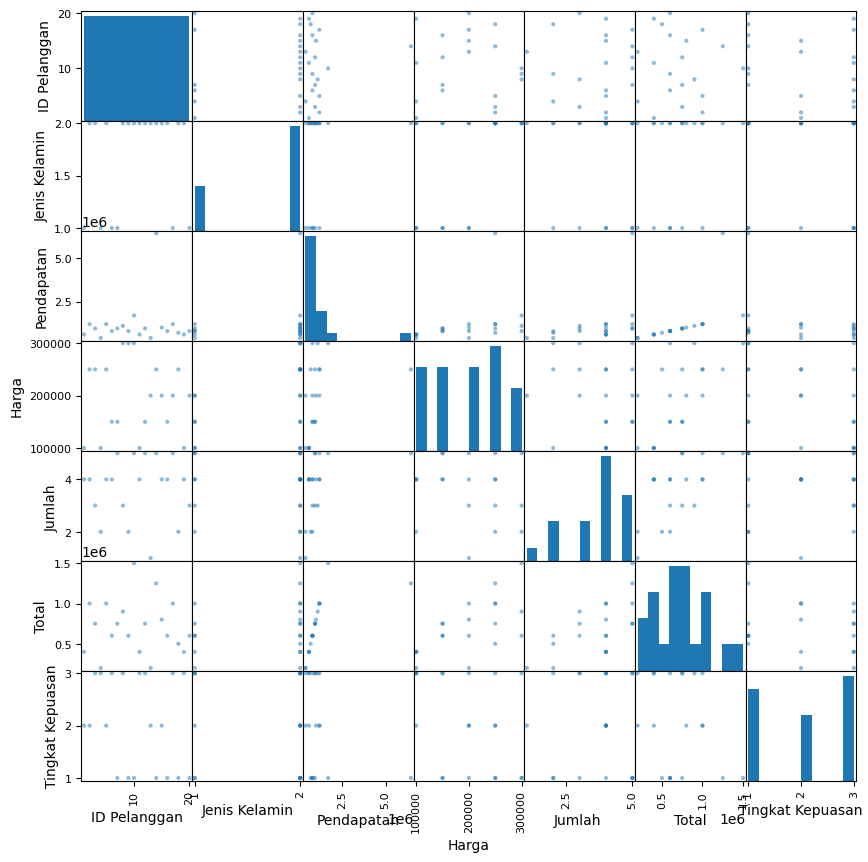

In [68]:
from pandas.plotting import scatter_matrix

_, ax = plt.subplots(1, 1, figsize=(10,10))
scatter_matrix(raw_data, ax=ax)
plt.show()

<ipython-input-75-1541a4ad8133>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(raw_data, diagonal='kde', ax=ax)


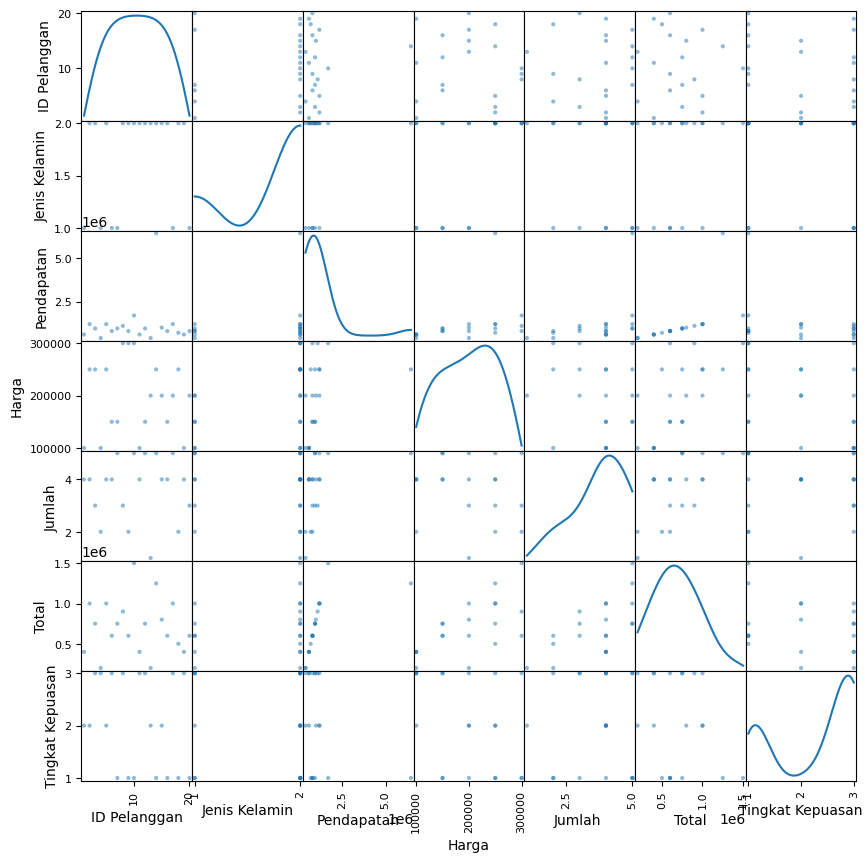

In [75]:
_, ax = plt.subplots(1, 1, figsize=(10,10))
scatter_matrix(raw_data, diagonal='kde', ax=ax)
plt.show()

Kita dapat melakukan pemodelan regresi linier sederhana dengan menggunakan statsmodels. statsmodels merupakan satu dari banyak package pada bahasa pemrograman python yang bisa digunakan untuk membantu melakukan pemodelan regresi linier sederhana.

Rumus yang digunakan seperti berikut :

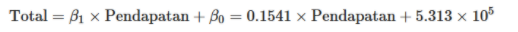

In [77]:
raw_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dataset_statistic.csv', sep=';')
raw_data2.head()

,ID Pelanggan,Nama,Jenis Kelamin,Pendapatan,Produk,Harga,Jumlah,Total,Tingkat Kepuasan
0,1,Arif,1,600000,A,100000,4,400000,2
1,2,Dian,2,1200000,D,250000,4,1000000,2
2,3,Dinda,2,950000,D,250000,3,750000,3
3,4,Fajar,1,400000,A,100000,2,200000,3
4,5,Ika,2,1200000,D,250000,4,1000000,2


2. Kita akan mengambil variabel 'Total' sebagai variabel tak bebas dan variabel 'Pendapatan' sebagai variabel bebas. Untuk menambahkan membentuk model yang disertai dengan intercept, kita harus menggunakan method .add_constant() untuk variabel bebas :

In [78]:
import statsmodels.api as sm

# Variabel tidak bebas(Dependen)
nilai_Y = raw_data2[['Total']]

# Variable bebas(Independen)
nilai_X = sm.add_constant(raw_data2[['Pendapatan']])

3. Selanjutnya kita dapat menggunakan method .OLS untuk membuat model regresi linier sederhana dengan memasukkan parameter endog=variabel_tak_bebas dan exog=variabel_bebas, disambung dengan method .fit():

In [79]:
model_regresi = sm.OLS(endog=nilai_Y, exog=nilai_X).fit()

In [81]:
print(model_regresi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.714
Date:                Mon, 27 Jan 2025   Prob (F-statistic):            0.00596
Time:                        17:50:42   Log-Likelihood:                -277.92
No. Observations:                  20   AIC:                             559.8
Df Residuals:                      18   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.313e+05   8.43e+04      6.300      0.0